In [2]:
#
# Electric potential
# Generate figures to be used in the problems sets
#
# Entorno:
# tikzplotlib necesita matplotlib <= 3.7
#
# conda create -n utntikz -c conda-forge matplotlib==3.7
# conda install -n utntikz -c conda-forge ipykernel tikzplotlib


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# from skimage.draw import disk, circle_perimeter
import tikzplotlib

# from datetime import datetime

In [2]:
# Formatter para agregar V a las etiquetas de las equipotenciales.
def fmt(x):
    # s = f"{x:.1f}"
    # if s.endswith("0"):
        # s = f"{x:.0f}"
    return f"{x}V"
    # return rf"{x}\text{V}" if plt.rcParams["text.usetex"] else f"{s} %"

x = np.arange(0,101)
y = np.arange(0,51)
X, Y = np.meshgrid(x, y)

In [3]:
# Distancias estén en cm, cargas en C
x1 = -0.20
y1 = 0
q1 = 0.25E-9
x2 = 1.20
y2 = 0.20
q2 = 0.5E-9

V1 = 9E9*q1/((X*0.01-x1)**2+(Y*0.01-y1)**2)**0.5
V2 = 9E9*q2/((X*0.01-x2)**2+(Y*0.01-y2)**2)**0.5
V = V1 + V2 

<Figure size 640x480 with 0 Axes>

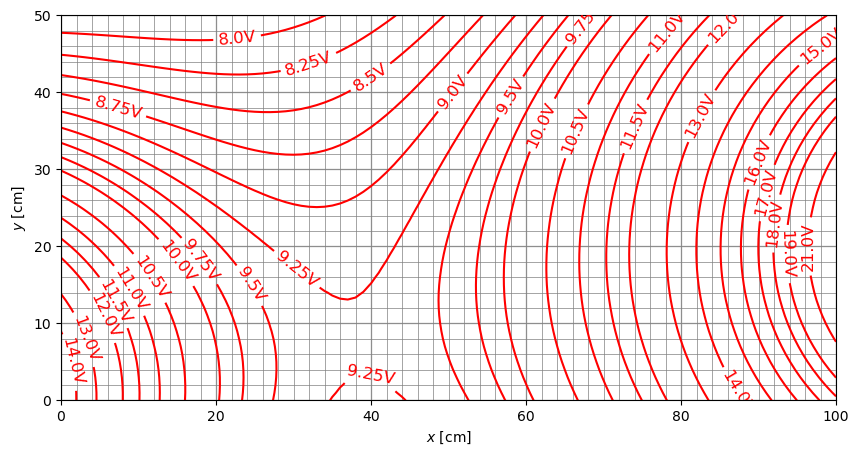

In [5]:
tikzplotlib.clean_figure()
levels = list(range(0,19))
levels = [8, 8.25, 8.5, 8.75,
          9, 9.25, 9.5, 9.75,
          10, 10.5, 11, 11.5,
          12, 13, 14, 15, 16,
          17,18,19,21]
fig, ax = plt.subplots(1, 1, figsize=(10,5),facecolor=(1, 1, 1) )

# Minor ticks o ticks sin etiquetas son ignorados en la
# figura producida por pgfplots usando como fuente la salida
# de tikzplotlib.
# Graficar la grilla sin usar ticks:
for i in range(2,51,2):
    x1,y1 = [0,100], [i,i]
    plt.plot(x1,y1, color='gray', linewidth=0.5)
for i in range(2,101,2):
    x1,y1 = [i,i], [0,50]
    plt.plot(x1,y1, color='gray', linewidth=0.5)

CS = ax.contour(X, Y, V, levels, colors='red')
# CS = ax.contour(X, Y, V, levels, cmap='RdPu')
ax.clabel(CS, inline=True, fmt=fmt, fontsize=12)
# ax.set_title('Equipotenciales de una cierta distribución de cargas')

ax.grid(which='major', linewidth=1)
# ax.grid(which='minor', linestyle=':', linewidth=0.5)
# ax.grid(which='minor', linewidth=0.8)
# ax.minorticks_on()
plt.xlabel('$x$ [cm]')
plt.ylabel('$y$ [cm]')

# plt.savefig("em_fig_equipotenciales_buscar_E.jpg", dpi='figure')
tikzplotlib.save("em_fig_equipotenciales_buscar_E.code.tex")

In [127]:
#TO-DO:

In [26]:
# Encontrar el campo eléctrico
def E2(x,y,z):
    """Calcula las componentes del campo eléctrico en N/C de un sistema de 2 cargas.
    Ingresar valores de x,y,z en metros y q en coulomb.
    """
    q1 = 0.25E-9
    x1 = -0.2
    y1 = 0
    z1 = 0

    q2 = 0.5E-9
    x2 = 1.2
    y2 = 0.2
    z2 = 0

    r = ((x - x1)**2 + (y - y1)**2 + (z - z1)**2)**(3/2)
    Ei1 = 9E9 * q1 * (x - x1) / r
    Ej1 = 9E9 * q1 * (y - y1) / r
    Ek1 = 9E9 * q1 * (z - z1) / r

    r = ((x - x2)**2 + (y - y2)**2 + (z - z2)**2)**(3/2)
    Ei2 = 9E9 * q2 * (x - x2) / r
    Ej2 = 9E9 * q2 * (y - y2) / r
    Ek2 = 9E9 * q2 * (z - z2) / r

    return Ei1+Ei2, Ej1+Ej2, Ek1+Ek2

In [27]:
# Calcular E en diferentes posiciones:
print("E(94cm,28cm,0) = ", E2(0.94,0.28,0))
print("E(6cm,30cm,0) = ", E2(0.06,0.30,0))



E(94cm,28cm,0) =  (-56.53602379846813, 18.273062380534505, 0.0)
E(6cm,30cm,0) =  (5.927194465728018, 11.088973215112778, 0.0)
